# Plots to evaluate runtimes on different models and setups

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#adult linlogreg
data_adult_linlogreg = pd.read_csv("../data/runtimes/runtimes_single_node_adult.csv").drop(columns=['exp_type'])
data_adult_linlogreg = data_adult_linlogreg.groupby('instances').mean()

In [14]:
#adult ffn
data_adult_ffn = pd.read_csv("../data/runtimes/runtimes_single_node_adult_ffn.csv").drop(columns=['exp_type'])
data_adult_ffn = data_adult_ffn.groupby('instances').mean()

In [4]:
#census svm
data_census_svm = pd.read_csv("../data/runtimes/runtimes_single_node_census.csv").drop(columns=['exp_type'])
data_census_svm = data_census_svm.groupby('instances').mean()
#data_census_svm

In [5]:
# Define a custom formatter function
def thousands_formatter(x, pos):
    return '%1.1f' % (x * 1e-3)

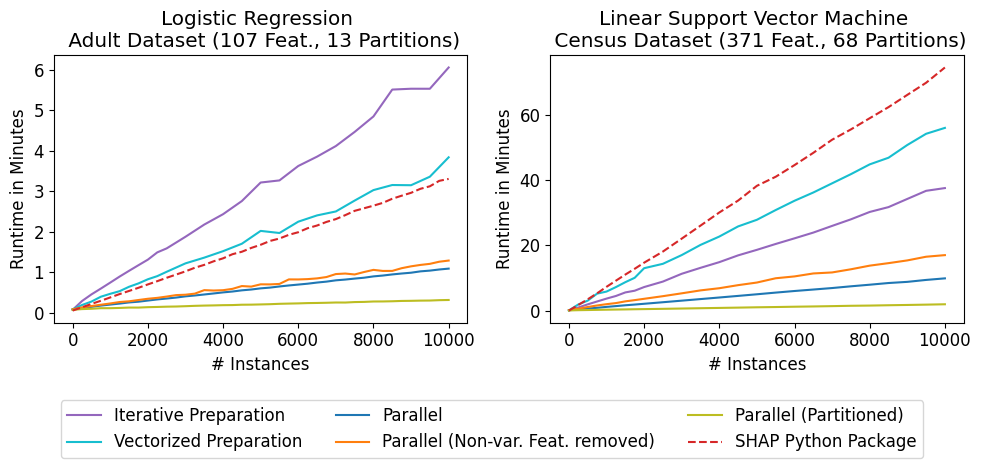

In [6]:
font = {'size' : 12}

matplotlib.rc('font', **font)

# Create a figure and three subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

#adult linlogreg
data_adult_linlogreg_tmp = data_adult_linlogreg.loc[data_adult_linlogreg.index <= 10000]
ax1.plot(data_adult_linlogreg_tmp.runtime_legacy_iterative[data_adult_linlogreg_tmp.runtime_legacy_iterative.notna()]/60, label="Iterative Preparation", color="tab:purple")
ax1.plot(data_adult_linlogreg_tmp.runtime_legacy[data_adult_linlogreg_tmp.runtime_legacy.notna()]/60, label="Vectorized Preparation", color="tab:cyan")
ax1.plot(data_adult_linlogreg_tmp.runtime_row/60, label="Parallel", color="tab:blue")
ax1.plot(data_adult_linlogreg_tmp.runtime_row_non_var/60, label="Parallel (Non-var. Feat. removed)", color="tab:orange")
#ax1.plot(data_adult_linlogreg_tmp.runtime_permutation/60, label="Permutation-wise", color="tab:green")
ax1.plot(data_adult_linlogreg_tmp.runtime_row_partitioned/60, label="Parallel (Partitioned)", color="tab:olive")
ax1.plot(data_adult_linlogreg_tmp.runtime_python/60, label="SHAP Python Package", linestyle="--", color="tab:red")



ax1.set_title("Logistic Regression \n Adult Dataset (107 Feat., 13 Partitions)")
ax1.set_xlabel("# Instances")
ax1.set_ylabel("Runtime in Minutes")

#census svm
data_tmp = data_census_svm.loc[data_census_svm.index <= 10000]
ax2.plot(data_tmp.runtime_legacy_iterative/60, color="tab:purple")
ax2.plot(data_tmp.runtime_row/60, color="tab:blue")
ax2.plot(data_tmp.runtime_legacy/60, color="tab:cyan")
ax2.plot(data_tmp.runtime_row_non_var/60, color="tab:orange")
#ax2.plot(data_tmp.runtime_permutation/60, color="tab:green")
ax2.plot(data_tmp.runtime_row_partitioned/60, color="tab:olive")

ax2.plot(data_tmp.runtime_python/60, linestyle="--", color="tab:red")

ax2.set_title("Linear Support Vector Machine \n Census Dataset (371 Feat., 68 Partitions)")
ax2.set_xlabel("# Instances")
ax2.set_ylabel("Runtime in Minutes")

fig.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0))
# Display the plot
plt.tight_layout()
plt.savefig("../data/runtimes/runtimes_linear_models.pdf", bbox_inches='tight')
plt.show()

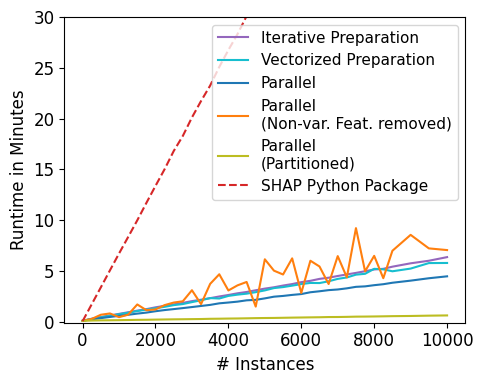

,runtime_python,runtime_row,runtime_row_non_var,runtime_row_partitioned,runtime_permutation,runtime_legacy,runtime_legacy_iterative
,mean,mean,mean,mean,mean,mean,mean
instances,,,,,,,
1,3.461802,5.681667,5.593000,4.881667,4.915333,5.289000,5.286667
250,102.944460,14.300000,16.277333,6.899000,59.494667,16.529833,17.468500
500,202.687802,21.135000,41.082000,7.979000,110.818667,25.695333,27.235500
750,303.205689,28.031333,48.773333,8.456333,162.163333,34.980167,36.938167
1000,402.869550,34.652667,26.817667,9.122000,215.515333,44.231333,46.254833
1250,500.539961,40.947333,41.558000,10.014333,268.626000,52.924333,55.773000
1500,598.777501,47.796333,101.889333,10.977667,324.901333,62.889833,65.358167
1750,701.675529,53.775000,68.121000,11.451000,367.905333,71.336500,74.290333


In [30]:
font = {'size' : 12}

matplotlib.rc('font', **font)
#adult ffn
#data_tmp = data_adult_ffn.loc[data_adult_ffn.index <= 10000]
data_tmp = data_adult_ffn.groupby('instances').agg(['mean']).loc[data_adult_ffn.index <= 10000].dropna()

fig, (ax1) = plt.subplots(1, 1, figsize=(5, 4))

ax1.plot(data_tmp.runtime_legacy_iterative/60, label="Iterative Preparation", color="tab:purple")

ax1.plot(data_tmp.runtime_legacy/60, label="Vectorized Preparation", color="tab:cyan")
ax1.plot(data_tmp.runtime_row['mean']/60, label="Parallel", color="tab:blue")

ax1.plot(data_tmp.runtime_row_non_var['mean']/60, label="Parallel\n(Non-var. Feat. removed)", color="tab:orange")
ax1.plot(data_tmp.runtime_row_partitioned['mean']/60, label="Parallel\n(Partitioned)", color="tab:olive")

ax1.plot(data_tmp.runtime_python['mean']/60, label="SHAP Python Package", linestyle="--", color="tab:red")

ax1.set_ylim(-.1,30)
ax1.set_xlabel("# Instances")
ax1.set_ylabel("Runtime in Minutes")
#fig.legend(loc='upper right', ncol=1, bbox_to_anchor=(1.05, 0.05), fontsize=11)
ax1.legend(loc='upper right', fontsize=11)
#ax1.set_title("Runtime for Feed-Forward Neural Network \n on Adult Dataset with 107 Features (14 Partitions)")
plt.tight_layout()
plt.savefig("../data/runtimes/runtimes_ffn.pdf", bbox_inches='tight')
plt.show()
data_tmp

In [19]:
a = pd.read_csv("../data/runtimes/runtimes_single_node_speedup.csv").groupby(['exp_type','instances']).mean()
b = pd.read_csv("../data/runtimes/runtimes_single_node_adult.csv").groupby(['exp_type','instances']).mean()
c = pd.read_csv("../data/runtimes/runtimes_single_node_adult_ffn.csv").groupby(['exp_type','instances']).mean()
d = pd.read_csv("../data/runtimes/runtimes_single_node_census.csv").groupby(['exp_type','instances']).mean()
data_speedup_mixed = pd.concat([b,c,d])#.groupby(['exp_type','instances']).mean()
data_speedup_mixed['speedup']=data_speedup_mixed.runtime_python/data_speedup_mixed.runtime_row

data_speedup_adult_linlogreg=data_speedup_mixed.xs('adult_linlogreg', level='exp_type')
data_speedup_adult_ffn=data_speedup_mixed.xs('adult_ffn', level='exp_type')
data_speedup_census_svm=data_speedup_mixed.xs('census_l2svm', level='exp_type')

In [20]:
print("Speed Ups of Row-Wise compared to shap:")
print("Adult LinLogReg: "+str(data_speedup_adult_linlogreg.speedup.mean()))
print("Census SVM: "+str(data_speedup_census_svm.speedup.mean()))
print("Adult FFN: "+str(data_speedup_adult_ffn.speedup.mean()))

Speed Ups of Row-Wise compared to shap:
Adult LinLogReg: 2.8430793859381347
Census SVM: 6.669176006111144
Adult FFN: 13.394108527893417


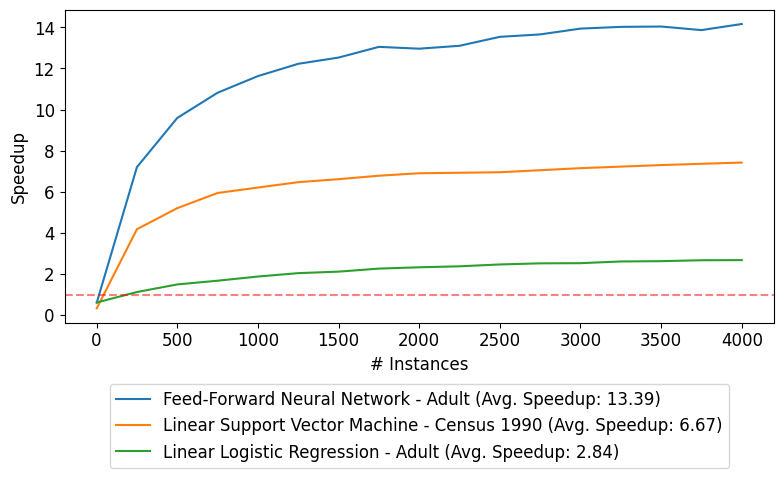

In [21]:
#speedup
cutoff=4000
plt.subplots(1, 1, figsize=(8, 4))

plt.plot(data_speedup_adult_ffn.speedup.loc[data_speedup_adult_ffn.index <= cutoff], label=f"Feed-Forward Neural Network - Adult (Avg. Speedup: {data_speedup_adult_ffn.speedup.mean():.2f})")
plt.plot(data_speedup_census_svm.speedup.loc[data_speedup_census_svm.index <= cutoff], label=f"Linear Support Vector Machine - Census 1990 (Avg. Speedup: {data_speedup_census_svm.speedup.mean():.2f})")
plt.plot(data_speedup_adult_linlogreg.speedup.loc[data_speedup_adult_linlogreg.index <= cutoff], label=f"Linear Logistic Regression - Adult (Avg. Speedup: {data_speedup_adult_linlogreg.speedup.mean():.2f})")
plt.axhline(y=1, color='r', linestyle='--', alpha=.5)

plt.xlabel("# Instances")
plt.ylabel("Speedup")

#plt.gca().xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(thousands_formatter))

# Place the text box in the plot
props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(3300,1.5,"Speedup = 1", verticalalignment='top', bbox=props)
#plt.text(5300, 12.5, speedup_text, fontsize=12,verticalalignment='top', bbox=props)

#plt.title("Speedup of Row-wise Parallelized Permutation Sampling over \n PermutationExplainer of the shap Python Package")
plt.tight_layout()
plt.legend(loc='upper center', ncol=1, bbox_to_anchor=(0.5, -0.17))
plt.savefig("../data/runtimes/runtimes_speedup.pdf", bbox_inches='tight')
plt.show()

In [22]:
data_speedup_mixed.xs('census_l2svm', level='exp_type')

,runtime_python,runtime_row,runtime_row_non_var,runtime_row_partitioned,runtime_permutation,runtime_legacy,runtime_legacy_iterative,speedup
instances,,,,,,,,
1,3.202561,9.688000,10.169333,5.433667,6.128333,6.784333,5.458667,0.330570
250,105.944842,25.362000,37.106667,10.315667,110.606333,115.151000,59.349667,4.177306
500,209.862905,40.350000,68.452000,13.123667,210.836333,185.585000,117.090667,5.201063
750,319.712300,53.821000,96.551333,16.205000,309.999000,314.098000,169.744000,5.940289
1000,438.619439,70.694000,120.469667,19.161333,405.426667,351.673333,222.568333,6.204479
1250,551.540785,85.299333,140.483333,21.924000,519.746667,433.908000,270.822333,6.465945
1500,663.560464,100.356333,172.087000,24.363667,629.984667,523.857000,336.082667,6.612044
1750,769.937931,113.571333,194.665333,27.461333,720.784333,604.691000,367.607667,6.779333
2000,881.604459,127.761000,219.094333,30.080667,815.539333,847.035667,436.910333,6.900419


## Appendix Stuff

# Cluster Runtime and Speedup

In [65]:
data_cluster_adult_census = pd.read_csv("../data/runtimes/runtimes_cluster_speedup_adult_census.csv")
data_cluster_adult_logits = data_cluster_adult_census[data_cluster_adult_census.exp_type == 'adult_linlogreg'].drop(columns=['exp_type'])

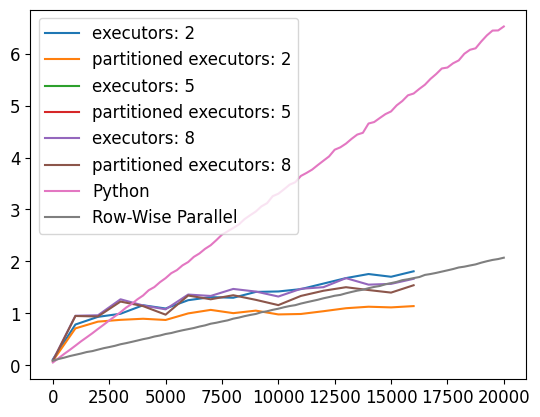

In [66]:
#adult logits

for executors in [2,5,8]:
    t_data = data_cluster_adult_logits[data_cluster_adult_logits.executors_cluster == executors].drop(columns=['executors_cluster']).groupby('instances').mean()
    plt.plot(t_data.runtime_cluster/60, label=f'executors: {executors}')
    plt.plot(t_data.runtime_cluster_partitioned/60, label=f'partitioned executors: {executors}')

plt.plot(data_adult_linlogreg.runtime_python/60, label='Python')
plt.plot(data_adult_linlogreg.runtime_row/60, label='Row-Wise Parallel')

plt.legend()

In [67]:
data_adult_linlogreg

,runtime_python,runtime_row,runtime_row_non_var,runtime_row_partitioned,runtime_permutation,runtime_legacy,runtime_legacy_iterative
instances,,,,,,,
1,3.202017,5.219667,5.075333,4.381667,4.831000,4.848000,4.407000
250,8.083667,7.210667,7.833000,5.386000,13.061333,11.481000,17.371667
500,13.057552,8.756667,9.879000,5.847667,19.813667,16.515000,27.177000
750,17.728819,10.601333,11.819333,6.734000,27.812667,23.721667,35.790333
1000,22.635576,12.069000,13.708000,6.731000,34.945333,28.041000,44.629333
...,...,...,...,...,...,...,...
19000,374.040228,118.504667,140.090000,28.156667,NaN,NaN,NaN
19250,381.088954,120.189667,136.415333,28.496667,NaN,NaN,NaN
19500,386.641201,121.665667,140.043333,28.908000,NaN,NaN,NaN


In [68]:
data_cluster_census_svm = data_cluster_adult_census[data_cluster_adult_census.exp_type == 'census_l2svm'].drop(columns=['exp_type'])

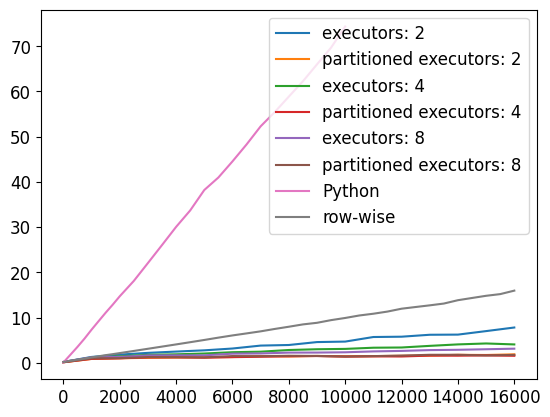

In [69]:
#census svm
xlim=16000

for executors in [2,4,8]:
    t_data = data_cluster_census_svm[data_cluster_census_svm.executors_cluster == executors].drop(columns=['executors_cluster']).groupby('instances').mean()
    plt.plot(t_data.runtime_cluster.loc[t_data.index <= xlim]/60, label=f'executors: {executors}')
    plt.plot(t_data.runtime_cluster_partitioned.loc[t_data.index <= xlim]/60, label=f'partitioned executors: {executors}')

plt.plot(data_census_svm.runtime_python.loc[data_census_svm.index <= 10000]/60, label='Python')
plt.plot(data_census_svm.runtime_row.loc[data_census_svm.index <= xlim]/60, label='row-wise')

plt.legend()

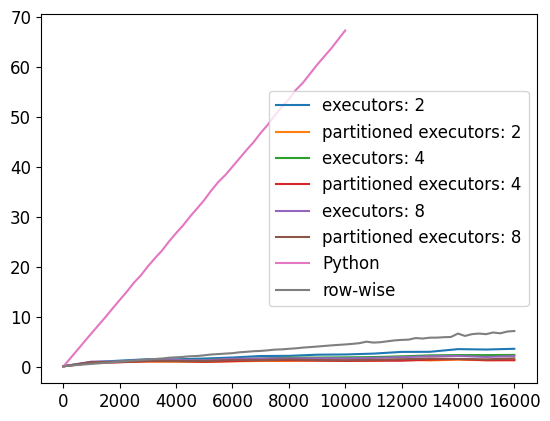

In [70]:
#adult ffn
data_cluster_adult_ffn = pd.read_csv("../data/runtimes/runtimes_cluster_adult_ffn.csv").drop(columns=['exp_type'])
xlim=16000

for executors in [2,4,8]:
    t_data = data_cluster_adult_ffn[data_cluster_adult_ffn.executors_cluster == executors].drop(columns=['executors_cluster']).groupby('instances').mean()
    plt.plot(t_data.runtime_cluster.loc[t_data.index <= xlim]/60, label=f'executors: {executors}')
    plt.plot(t_data.runtime_cluster_partitioned.loc[t_data.index <= xlim]/60, label=f'partitioned executors: {executors}')

plt.plot(data_adult_ffn.runtime_python.loc[data_adult_ffn.index <= 10000]/60, label='Python')
plt.plot(data_adult_ffn.runtime_row.loc[data_adult_ffn.index <= xlim]/60, label='row-wise')

plt.legend()

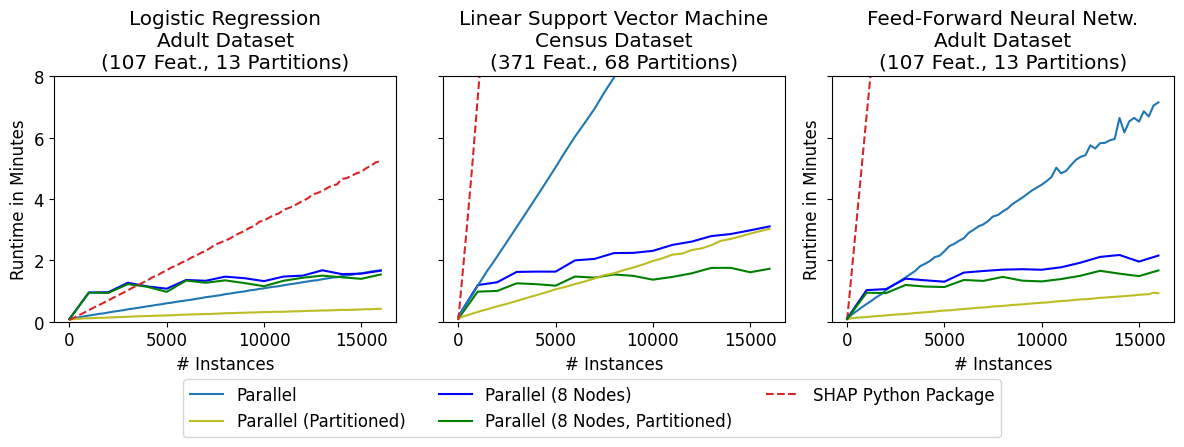

In [83]:
# combined plot

font = {'size' : 12}

matplotlib.rc('font', **font)

# Create a figure and three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey='row')

#adult linlogreg
xlim = 16000

ax1.plot(data_adult_linlogreg.runtime_row.loc[data_adult_linlogreg.index <= xlim]/60, label="Parallel", color="tab:blue")
ax1.plot(data_adult_linlogreg.runtime_row_partitioned.loc[data_adult_linlogreg.index <= xlim]/60, label="Parallel (Partitioned)", color="tab:olive")

t_data = data_cluster_adult_logits[data_cluster_adult_logits.executors_cluster == 8].drop(columns=['executors_cluster']).groupby('instances').mean()
ax1.plot(t_data.runtime_cluster.loc[t_data.index <= xlim]/60, label=f'Parallel (8 Nodes)', color="blue")
ax1.plot(t_data.runtime_cluster_partitioned.loc[t_data.index <= xlim]/60, label=f'Parallel (8 Nodes, Partitioned)', color="green")

ax1.plot(data_adult_linlogreg.runtime_python.loc[data_adult_linlogreg.index <= xlim]/60, label="SHAP Python Package", linestyle="--", color="tab:red")

ax1.set_title("Logistic Regression\nAdult Dataset\n(107 Feat., 13 Partitions)")
ax1.set_xlabel("# Instances")
ax1.set_ylabel("Runtime in Minutes")


#census svm
t_data = data_cluster_census_svm[data_cluster_census_svm.executors_cluster == 8].drop(columns=['executors_cluster']).groupby('instances').mean()
ax2.plot(t_data.runtime_cluster.loc[t_data.index <= xlim]/60, color="blue")
ax2.plot(t_data.runtime_cluster_partitioned.loc[t_data.index <= xlim]/60, color="green")

ax2.plot(data_census_svm.runtime_row.loc[data_census_svm.index <= xlim]/60, color="tab:blue")
ax2.plot(data_census_svm.runtime_row_partitioned.loc[data_census_svm.index <= xlim]/60, color="tab:olive")

ax2.plot(data_census_svm.runtime_python.loc[data_census_svm.index <= 6000]/60, linestyle="--", color="tab:red")

ax2.set_title("Linear Support Vector Machine\nCensus Dataset\n(371 Feat., 68 Partitions)")
ax2.set_xlabel("# Instances")
#ax2.set_ylabel("Runtime in Minutes")
ax2.set_ylim(-1,8)


ax3.plot(data_adult_ffn.runtime_row.loc[data_adult_ffn.index <= xlim]/60, color="tab:blue")
ax3.plot(data_adult_ffn.runtime_row_partitioned.loc[data_adult_ffn.index <= xlim]/60, color="tab:olive")
ax3.plot(data_adult_ffn.runtime_python.loc[data_adult_ffn.index <= xlim]/60, linestyle="--", color="tab:red")
t_data = data_cluster_adult_ffn[data_cluster_adult_ffn.executors_cluster == 8].drop(columns=['executors_cluster']).groupby('instances').mean()
ax3.plot(t_data.runtime_cluster.loc[t_data.index <= xlim]/60, color="blue")
ax3.plot(t_data.runtime_cluster_partitioned.loc[t_data.index <= xlim]/60, color="green")

ax3.set_xlabel("# Instances")
ax3.set_ylabel("Runtime in Minutes")
ax3.set_ylim(0,8)
ax3.set_title("Feed-Forward Neural Netw.\nAdult Dataset\n(107 Feat., 13 Partitions)")
#ax3.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(thousands_formatter))

fig.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.05))
# Display the plot
plt.tight_layout()
plt.savefig("../data/runtimes/runtimes_models_cluster.pdf", bbox_inches='tight')
plt.show()

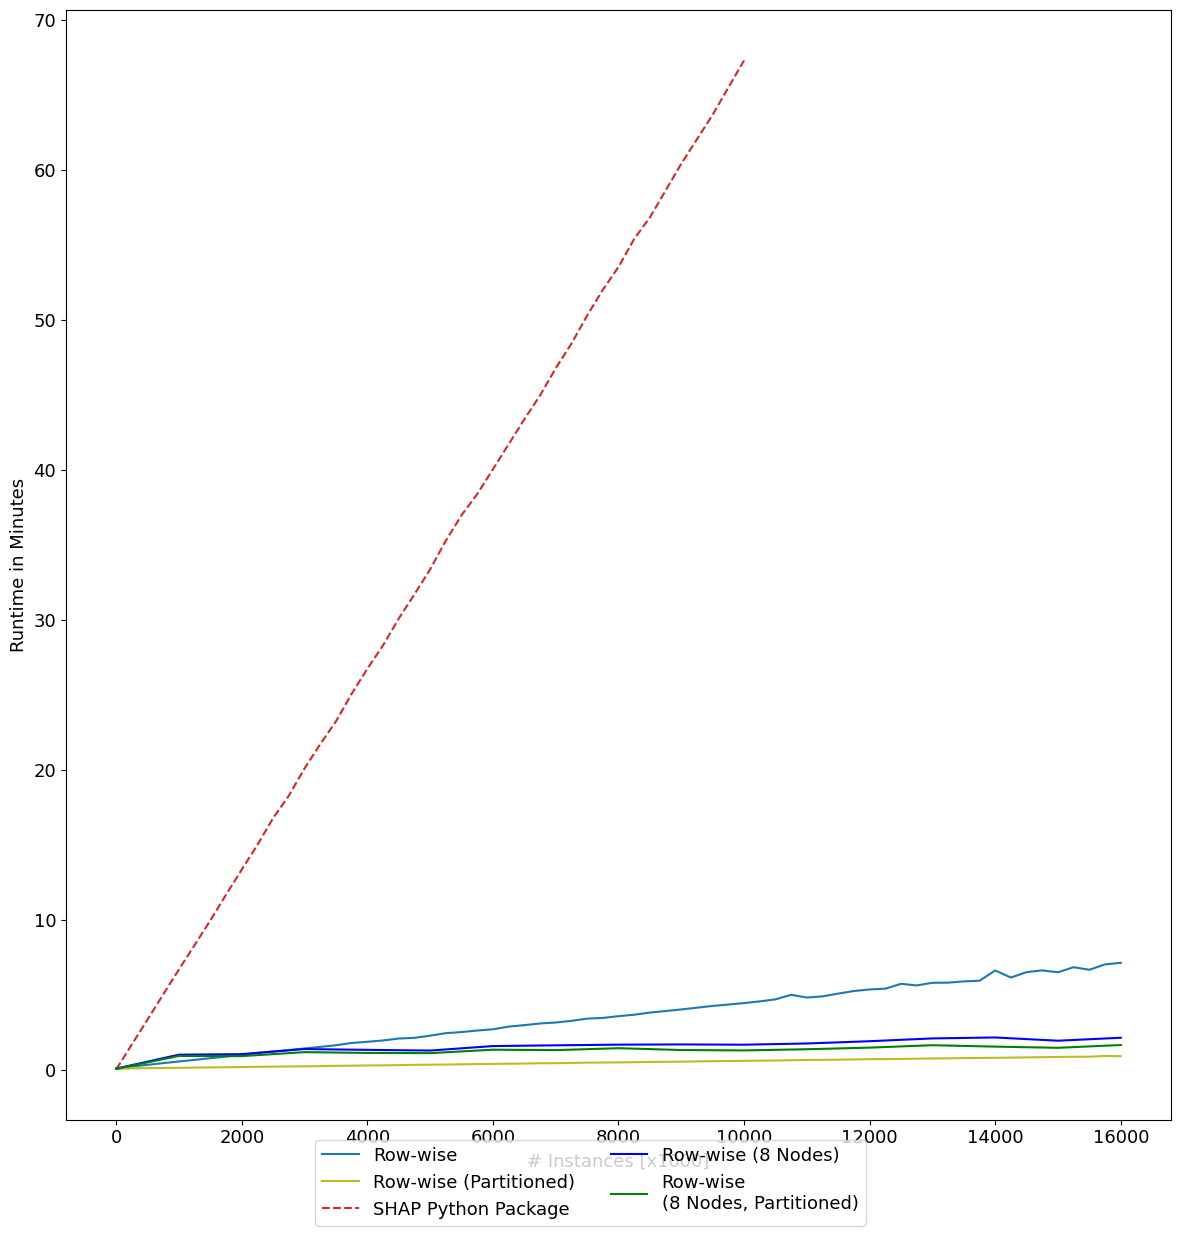

In [38]:
#adult ffn
font = {'size' : 13}

matplotlib.rc('font', **font)

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))
#adult linlogreg
xlim = 30000

ax1.plot(data_adult_ffn.runtime_row.loc[data_adult_ffn.index <= xlim]/60, label="Row-wise", color="tab:blue")
ax1.plot(data_adult_ffn.runtime_row_partitioned.loc[data_adult_ffn.index <= xlim]/60, label="Row-wise (Partitioned)", color="tab:olive")
ax1.plot(data_adult_ffn.runtime_python.loc[data_adult_ffn.index <= xlim]/60, label="SHAP Python Package", linestyle="--", color="tab:red")
t_data = data_cluster_adult_ffn[data_cluster_adult_ffn.executors_cluster == 8].drop(columns=['executors_cluster']).groupby('instances').mean()
ax1.plot(t_data.runtime_cluster.loc[t_data.index <= xlim]/60, label=f'Row-wise (8 Nodes)', color="blue")
ax1.plot(t_data.runtime_cluster_partitioned.loc[t_data.index <= xlim]/60, label=f'Row-wise\n(8 Nodes, Partitioned)', color="green")

ax1.set_xlabel("# Instances [x1000]")
ax1.set_ylabel("Runtime in Minutes")
#ax1.set_ylim(0,10)
#ax1.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(thousands_formatter))
fig.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.05))
#ax1.set_title("Runtime for Feed-Forward Neural Network \n on Adult Dataset with 107 Features (14 Partitions)")
plt.tight_layout()
plt.savefig("../data/runtimes/runtimes_ffn_cluster.pdf", bbox_inches='tight')
plt.show()

In [36]:
data_speedup_cluster = data_cluster_census_svm[['instances','runtime_cluster','executors_cluster']].groupby(['executors_cluster','instances']).mean().join(data_census_svm[['runtime_row','runtime_row_partitioned']], on='instances')
data_speedup_cluster['speedup_row'] = data_speedup_cluster.runtime_row / data_speedup_cluster.runtime_cluster
data_speedup_cluster['speedup_row_partitioned'] = data_speedup_cluster.runtime_row_partitioned / data_speedup_cluster.runtime_cluster
data_speedup_cluster = data_speedup_cluster.reset_index(level=0)

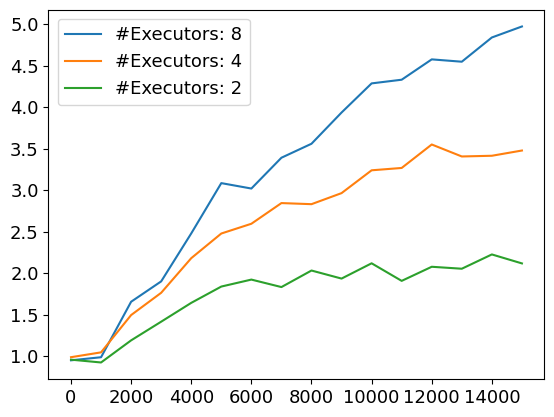

In [37]:
xlim = 15000
for executors in [8,4,2]:
    t_data = data_speedup_cluster[data_speedup_cluster.executors_cluster == executors]
    plt.plot(t_data.speedup_row.loc[t_data.index <= xlim], label=f'#Executors: {executors}')
    
plt.legend()

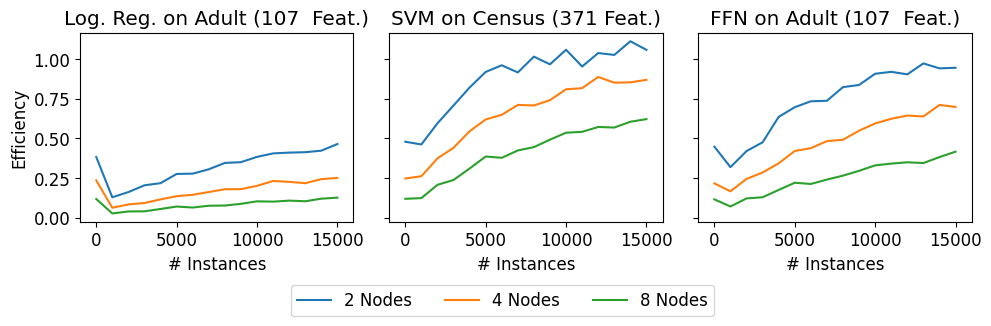

In [128]:



# combined plot

font = {'size' : 12}

matplotlib.rc('font', **font)

# Create a figure and three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3), sharey='row')


xlim = 15000

#prep logits data
#prep svm data
data_scalability_cluster_adult_logits = data_cluster_adult_logits[['instances','runtime_cluster','executors_cluster']].groupby(['executors_cluster','instances']).mean().join(data_adult_linlogreg[['runtime_row','runtime_row_partitioned']], on='instances')
data_scalability_cluster_adult_logits['scalability_row'] = data_scalability_cluster_adult_logits.runtime_row / data_scalability_cluster_adult_logits.runtime_cluster
data_scalability_cluster_adult_logits['scalability_row_partitioned'] = data_scalability_cluster_adult_logits.runtime_row_partitioned / data_scalability_cluster_adult_logits.runtime_cluster
data_scalability_cluster_adult_logits = data_scalability_cluster_adult_logits.reset_index(level=0)

for executors in [2,4,8]:
    t_data = data_scalability_cluster_adult_logits[data_scalability_cluster_adult_logits.executors_cluster == executors]
    t_max = t_data.loc[t_data.index<=xlim].scalability_row.max()
    ax1.plot(t_data.scalability_row.loc[t_data.index <= xlim]/executors)

ax1.set_title("Log. Reg. on Adult (107  Feat.)")
#ax2.legend(ncol=1)
ax1.set_xlabel("# Instances")
ax1.set_ylabel("Efficiency")
ax1.set_xlim(-1000,xlim+1000)



#prep svm data
data_scalability_cluster_census_svm = data_cluster_census_svm[['instances','runtime_cluster','executors_cluster']].groupby(['executors_cluster','instances']).mean().join(data_census_svm[['runtime_row','runtime_row_partitioned']], on='instances')
data_scalability_cluster_census_svm['scalability_row'] = data_scalability_cluster_census_svm.runtime_row / data_scalability_cluster_census_svm.runtime_cluster
data_scalability_cluster_census_svm['scalability_row_partitioned'] = data_scalability_cluster_census_svm.runtime_row_partitioned / data_scalability_cluster_census_svm.runtime_cluster
data_scalability_cluster_census_svm = data_scalability_cluster_census_svm.reset_index(level=0)

for executors in [2,4,8]:
    t_data = data_scalability_cluster_census_svm[data_scalability_cluster_census_svm.executors_cluster == executors]
    t_max = t_data.loc[t_data.index<=xlim].scalability_row.max()
    ax2.plot(t_data.scalability_row.loc[t_data.index <= xlim]/executors, label=f'{executors} Nodes')

ax2.set_title("SVM on Census (371 Feat.)")
#ax2.legend(ncol=1)
ax2.set_xlabel("# Instances")
ax2.set_xlim(-1000,xlim+1000)

#prep ffn data
data_scalability_cluster_adult_ffn = data_cluster_adult_ffn[['instances','runtime_cluster','executors_cluster']].groupby(['executors_cluster','instances']).mean().join(data_adult_ffn[['runtime_row','runtime_row_partitioned']], on='instances')
data_scalability_cluster_adult_ffn['scalability_row'] = data_scalability_cluster_adult_ffn.runtime_row / data_scalability_cluster_adult_ffn.runtime_cluster
data_scalability_cluster_adult_ffn['scalability_row_partitioned'] = data_scalability_cluster_adult_ffn.runtime_row_partitioned / data_scalability_cluster_adult_ffn.runtime_cluster
data_scalability_cluster_adult_ffn = data_scalability_cluster_adult_ffn.reset_index(level=0)

for executors in [2,4,8]:
    t_data = data_scalability_cluster_adult_ffn[data_scalability_cluster_adult_ffn.executors_cluster == executors]
    t_max = t_data.loc[t_data.index<=xlim].scalability_row.max()
    ax3.plot(t_data.scalability_row.loc[t_data.index <= xlim]/executors)

ax3.set_title("FFN on Adult (107  Feat.)")
#ax2.legend(ncol=1)
ax3.set_xlabel("# Instances")
ax3.set_xlim(-1000,xlim+1000)




#fig.suptitle("Cluster Scalability of Row-wise Parallelized Permutation Sampling\nSVM on Census with 371 Features")
plt.tight_layout()
fig.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.05))

plt.savefig("../data/runtimes/runtimes_scalability.pdf", bbox_inches='tight')
plt.show()

======= SCALABILITY CLUSTER =======
--- SVM ---
Max Scalability n=2: 2.2343431514834933
Max Scalability n=4: 3.461705110438325
Max Scalability n=8: 4.912667284347129


2.2343431514834933